[깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%B6%9C%EB%8F%99%ED%98%95%20%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC)

## 머신러닝
### 1. 데이터 탐색 
#### (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA).
#### (2) 이상치를 식별하고 처리하시오.
#### (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/diabetes_for_test.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


In [34]:
# outcome에 따른 각 컬럼별 평균값
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


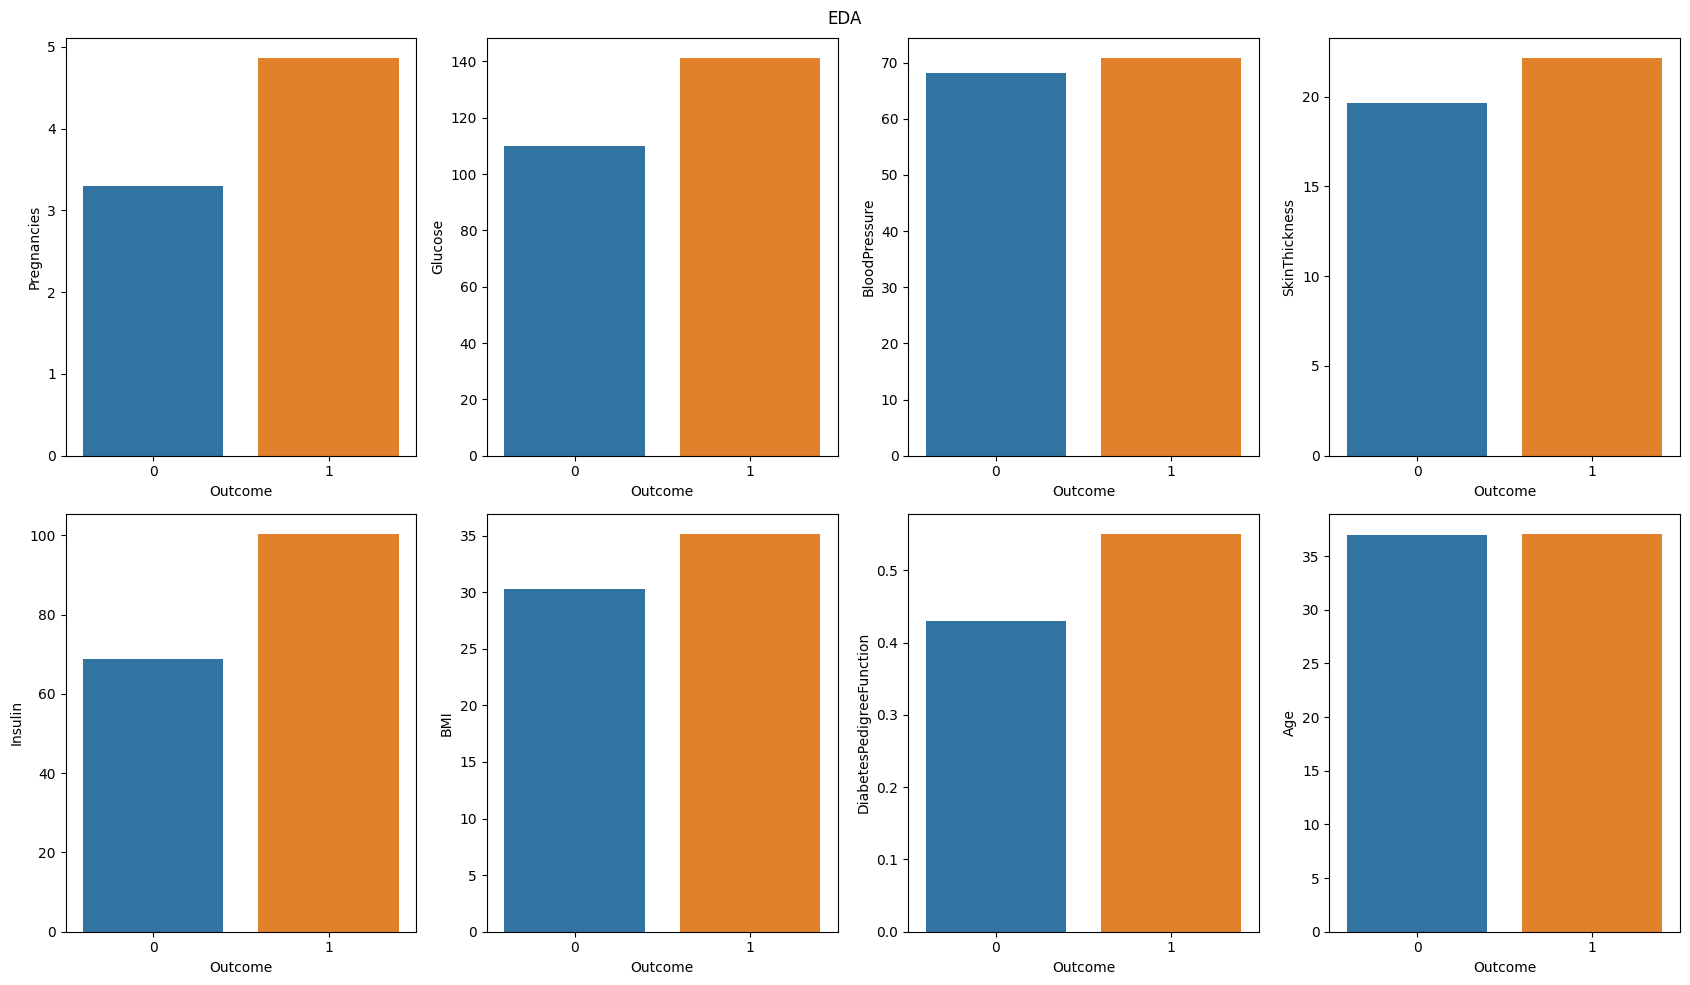

In [22]:
fig, ax = plt.subplots(2, 4, figsize=(17,10))

features = df.drop(columns=['Outcome'], axis=1).columns

for i, feature in zip(range(8), features):
    row = int(i/4)
    col = i%4
    sns.barplot(data=df, x='Outcome', y=feature, ax=ax[row][col], ci=None)

plt.suptitle('EDA')
plt.tight_layout()
plt.show()

[해석]
- 당뇨병이 있는 사람은 그렇지 않은 사람보다 Pregnancies 수치가 더 높음.
- 당뇨병이 있는 사람은 그렇지 않은 사람보다 Glucose 수치가 더 높음.
- 당뇨병이 있는 사람은 그렇지 않은 사람보다 Insulin 수치가 더 높음.
- 당뇨병이 있는 사람은 그렇지 않은 사람보다 BMI 수치가 더 높음.

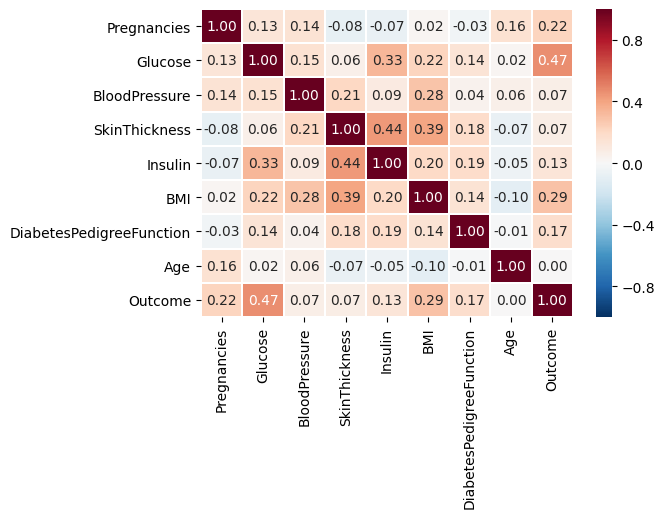

In [14]:
df_corr = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='RdBu_r', linewidth=.3)
plt.show()

[해석]
- Outcome과 Glucose 간에 약한 양의 상관성이 존재함(0.47).
- SkinThickness와 Inslin 간에 약한 상의 상관성이 존재함(0.44).
- BMI와 SkinThickness 간에 약한 상의 상관성이 존재함(0.39).
- 따라서 Outcome을 제외한 변수들 간에 0.9 이상의 상관성은 없으므로 모든 변수를 모델링해도 될 것임.

#### (2) 이상치를 식별하고 처리하시오.

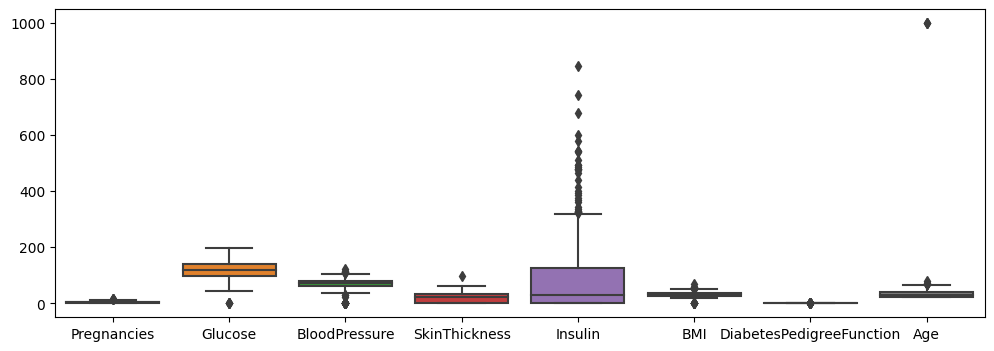

In [29]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.show()

[해석]
- 상자 그림을 시각화한 결과, Age에서 가장 멀리 떨어진 이상치가 존재하기에 이상치 처리가 필요하다고 판단함.
- Insulin 에서도 이상치가 많이 발견되었지만 실제로 이상치를 가진 사람이 있을 수 있기에 현업의 의견이 필요할 것으로 판단되어 Age의 이상치만 처리함.

<AxesSubplot:xlabel='Age'>

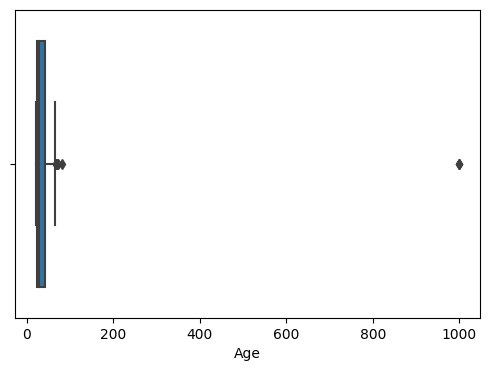

In [35]:
# Age 상자그림
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='Age')
plt.show()

In [38]:
# Age 값 내림차순
df['Age'].sort_values(ascending=False)

629    999
684    999
559    999
459     81
453     72
      ... 
486     21
136     21
145     21
465     21
511     21
Name: Age, Length: 768, dtype: int64

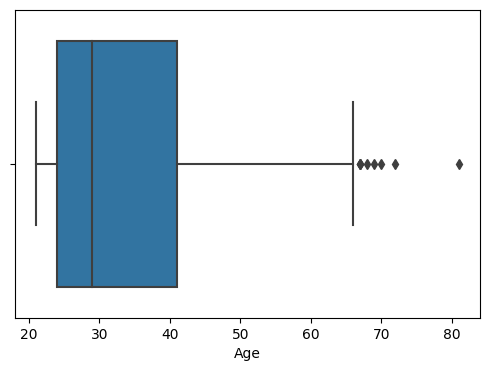

In [2]:
# Age 이상치를 중앙값으로 대체
cond = (df['Age'] >= 100)
df.loc[cond, 'Age'] = np.median(df.Age)

# Age 상자그림
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='Age')
plt.show()

In [3]:
# Glucose, BloodPressure 이상치 대체(중앙값)
cond = (df['Glucose'] == 0)
df.loc[df.loc[cond].index, 'Glucose'] = df.Glucose.median()

cond = (df['BloodPressure'] == 0)
df.loc[df.loc[cond].index, 'BloodPressure'] = df.BloodPressure.median()

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.

- describe() 함수 결과, 최솟값, 최댓값의 차이가 많이 나는 컬럼이 존재하기에, 선형 모델 사용시, scale를 적용할 필요가 있음.

### 2. 클래스 불균형 처리
#### (1) 업 샘플링 과정을 설명하고 결과를 작성하시오

In [4]:
x = df.drop('Outcome', axis=1)
y=df.Outcome

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated

Counter({1: 500, 0: 500})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing i

In [6]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({1: 500, 0: 500})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[해석]
- 업 샘플링은 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세의 수만큼 증가시키는 것을 의미함.
- SMOTE을 이용하면 소수 레이블을 지닌 데이터세트의 관측값에 대한 K개 최근접 이웃을 찾고, 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플을 수를 늘림.
- 기존에 268개였던 0 레이블이 500으로 증가함.

#### (2) 언더 샘플링 과정을 설명하고 결과를 작성하시오.

In [7]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 'majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 268, 1: 268})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[해석]
- 언더 샘플링은 다수를 차지하는 레이블에서 무작위로 데이터를 제거하는 방식임.
- sampling_strategy = 'majority'을 설정하여 다수 레이블의 데이터를 샘플링하여 소수 레이블의 데이터 수와 동일하게 함.
- 기존에 500개였던 1 레이블이 268개로 감소함.

#### (3) 둘 중 하나를 선택하고 선택한 이유를 서술하시오.
- 언더 샘플링은 데이터 손실이 발생하고, 과대적합 위험이 있기에 오버 샘플링을 선택함.

### 3. 모델링
#### (1) 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

log = LogisticRegression(solver='liblinear')
xgb = XGBClassifier(random_state=0)
svm_clf = SVC(kernel='linear')

X = df.drop('Outcome', axis=1)
y = df[['Outcome']]

[해석]
속도 측면에서 Logistic regression, 정확도 측면에서 SVM, 기타로 XGBoost를 제시함.

#### (2) 모델을 비교하고 결과를 설명하시오.

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

## 5개의 경우의 수로 분할하여 검증 
kfold = KFold()
def model_result(model):
    pred_li =[]
    for train_index, test_index in kfold.split(X):
        X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train,y_test = y.iloc[train_index,:],y.iloc[test_index,:]
        
        X_train_resample, y_train_resample = smote.fit_resample(X_train,y_train)
        
        start = time.time()
        model.fit(X_train_resample, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test)
        pred_li.append(accuracy_score(pred,y_test['Outcome']))
        
    ## 마지막 데이터 학습 속도     
    print(f"{end - start:.5f} sec")
    ## 5개의 train데이터에 대한 정확도의 평균 값  
    print(np.mean(pred_li))

In [43]:
model_result(log)

0.00698 sec
0.7657414480943892


In [44]:
model_result(xgb)

[10:22:59] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:22:59] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:22:59] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:23:00] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

In [45]:
model_result(svm_clf)

2.88627 sec
0.7644257703081233


[해석]
- 로지스틱 회귀분석의 속도가 가장 빨랐고, svm의 정확도가 가장 높음.

#### (3) 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.
[해석]
- 차원 축소 방법 중에 PCA를 사용할 수 있는데 이는 여러 변수 간에 존재하는 상관관계를 이용하는 차원 축소방법으로 데이터를 축에 사영했을 때 분산이 가장 높은 축을 찾아 그 축을 새로운 주성분으로 결정하는 방법임.
- PCA를 하기 전에 변수 간 스케일의 차이가 주성분 선정에 영향을 주는 것을 막기 위해 스케일링을 진행함.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, stratify=y, test_size=.3)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())

[0.26110315 0.22613628 0.12025873 0.10650649 0.1016306  0.08197042
 0.05251497 0.04987936]
0.8156352463546326


[해석]
- 8개의 독립변수 대신 5 주성분까지 사용하면 전체 데이터의 81%를 설명할 수 있음을 파악함.

In [68]:
def pca_model_result(model):
    pred_li = []
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
        y_train, y_test = y.iloc[train_idx, :], y.iloc[test_idx, :]
        
        X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
        
        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train_resample)
        X_test_sc = scaler.transform(X_test)
        
        pca = PCA(n_components=5)
        X_train_pca = pca.fit_transform(X_train_sc)
        X_test_pca = pca.transform(X_test_sc)
        
        start = time.time()
        model.fit(X_train_pca, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test_pca)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
        
    print(f'{end-start:.5f} sec')
    print(np.mean(pred_li))

In [69]:
pca_model_result(log)

0.00100 sec
0.7292250233426704


In [70]:
pca_model_result(xgb)

[11:11:03] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:03] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:04] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:04] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

In [71]:
pca_model_result(svm_clf)

0.01898 sec
0.7266276207452679


[해석]
- 예측 성능은 다소 떨어졌지만 속도는 차원 축소에 의해 더 빨라짐을 확인함.

---
## 통계분석
### 1. 회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05)
#### (1) 귀무가설과 대립가설을 작성하시오.
[가설]
- 귀무가설: 제품의 금속 재질 함유량의 분산은 1.3이다.
- 대립가설: 제품의 금속 재질 함유량의 분산은 1.3이 아니다.

#### (2) 가설을 양측 검정하시오.

In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/metalicity')
df.head()

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529


In [81]:
# 해당 분포가 정규분포인지 판단
## 귀무가설: 정규분포이다.
## 대립가설: 정규분포가 아니다.
import scipy.stats as stats
from scipy.stats import shapiro

shapiro(df['metalicity']) # 정규성을 만족함.

ShapiroResult(statistic=0.9822470545768738, pvalue=0.050023749470710754)

In [85]:
# 정규분포이며, 해당 데이터의 평균을 갖고 분산이 1.3인 150개 행의 데이터를 만들고 등분산 검정 진행
test = np.random.normal(np.mean(df.metalicity), 1.3**.5, 150) # 평균, 표준편차, 샘플 개수
test

array([46.76472959, 46.19411489, 44.73060659, 43.46608728, 43.42035136,
       45.34583802, 46.02406463, 45.53309202, 45.31515016, 45.65401812,
       45.56887323, 43.61258443, 46.99851957, 43.91874244, 42.85862506,
       44.17665691, 44.53399312, 45.24923226, 44.30731528, 44.6660989 ,
       46.07070917, 43.07710533, 47.53412582, 44.18886155, 45.46808677,
       44.2334589 , 47.42934067, 43.85935067, 46.77563523, 44.41576474,
       46.87305416, 44.91225537, 45.52219816, 47.50466486, 44.65359732,
       44.67338309, 46.40384385, 44.79723177, 43.83903762, 46.64425782,
       44.86123672, 44.65899649, 44.22577067, 46.5900823 , 45.66104016,
       46.29528005, 44.75268711, 45.08939558, 45.77325354, 44.61497094,
       46.04447049, 44.46073155, 46.84978249, 46.37556116, 46.63743729,
       45.54501504, 46.23145962, 42.76297235, 44.69937025, 45.77602025,
       46.64139576, 43.92462447, 46.65066505, 44.56252154, 45.97812966,
       46.09899361, 44.60104957, 46.11616088, 46.07625216, 45.10

In [86]:
stats.levene(df.metalicity, test)

LeveneResult(statistic=11.244268330760772, pvalue=0.0009018879572763375)

[해석]
- shapiro test를 통해 데이터가 정규성을 만족한다는 것을 토대로 등분산 검정을 수행함.
- 그 결과, p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각할 수 있음.
- 즉, 제품의 금속 재질 함유량의 분산은 1.3이 아니라고 할 수 있음.

### 2. 200개의 Lot별 불량 제품 수량 데이터에 따라 아래의 값을 구하시오.
#### (1) p관리도에 따라 관리중심성(Center LIne), 관리 상한선, 하한선을 구하시오.
#### (2) 관리도를 시각화하시오.

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/lot_quality.csv')
df = df.set_index('lot')
df.head()

,생산수량,불량수량
lot,,
1,587,19
2,588,15
3,455,19
4,666,12
5,750,15


#### (1) p관리도에 따라 관리중심성(Center LIne), 관리 상한선, 하한선을 구하시오.

In [101]:
df["p"] = df["불량수량"]/df["생산수량"]
df["UCL"] = df["p"] + (3 * (df["p"]* (1-df["p"]) / df["생산수량"])**0.5)
df["LCL"] = df["p"] - (3 * (df["p"]* (1-df["p"]) / df["생산수량"])**0.5)


## 관리 중심선 : 전체 불량 비율 
CL = df["불량수량"].sum() / df["생산수량"].sum()
print("관리중심선 : " , CL )
df

관리중심선 :  0.029024320840935338


,생산수량,불량수량,p,UCL,LCL
lot,,,,,
1,587,19,0.032368,0.054282,0.010454
2,588,15,0.025510,0.045017,0.006004
3,455,19,0.041758,0.069892,0.013625
4,666,12,0.018018,0.033481,0.002555
5,750,15,0.020000,0.035336,0.004664
...,...,...,...,...,...
196,631,18,0.028526,0.048407,0.008645
197,565,21,0.037168,0.061044,0.013292
198,570,12,0.021053,0.039092,0.003013


#### (2) 관리도를 시각화하시오.

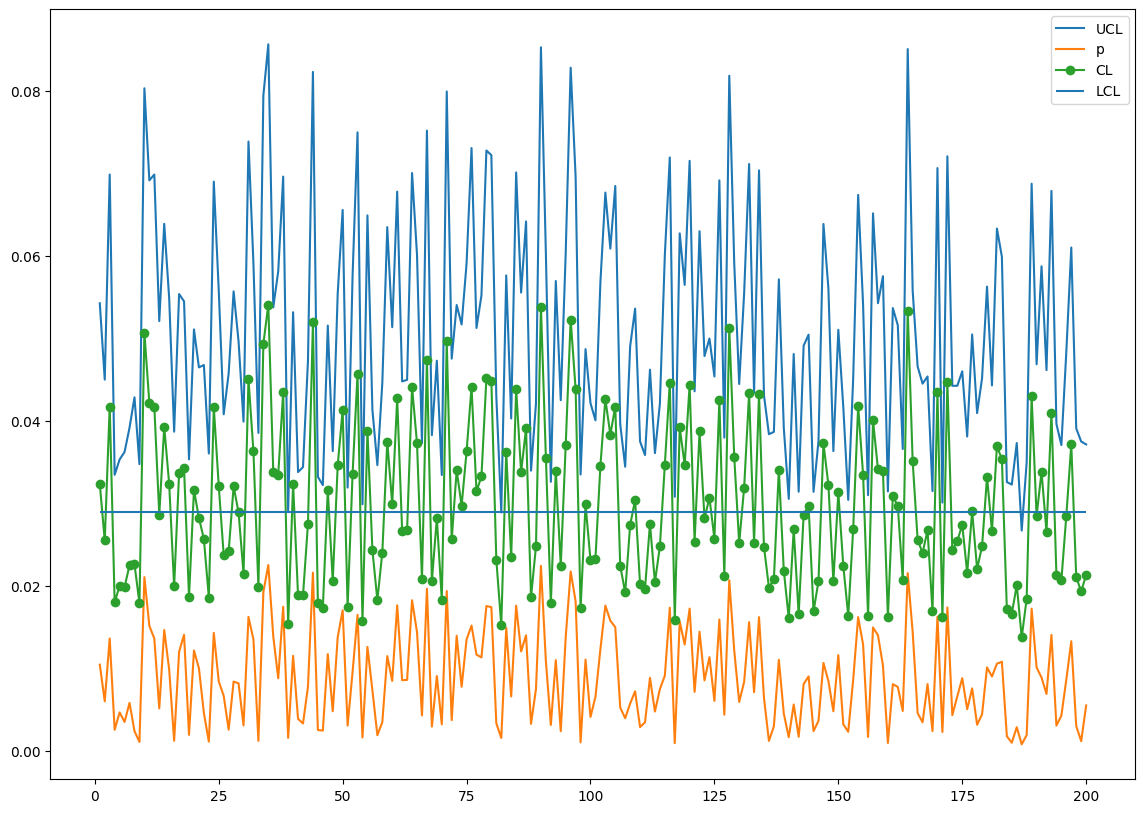

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.plot(df['UCL'])
plt.plot(df['LCL'])
plt.plot(df['p'], marker='o')
plt.hlines(CL, 1, 200)
plt.legend(['UCL', 'p','CL','LCL'])

### 3.표에 제품 1, 2를 만드는데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품2의 개수를 구하라. 재료 공급량 { a: 1300, b: 1000, c:1200 }(10점)

pass

### 4. 상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다.
#### (1) 구매 패턴으로 볼 때 두 상품이 연관이 있는지 가설을 세우고 검정하시오.
[가설]
- 귀무가설: 연속적인 관측값이 임의적이다.
- 대립가설: 연속적인 관측값이 임의적이 아니다.

In [104]:
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
df = pd.DataFrame(data, columns=['product'])
df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [105]:
from statsmodels.sandbox.stats.runs import runstest_1samp

# run-test를 위한 데이터 변환
df.loc[df['product']=='a', 'product'] = 1
df.loc[df['product']=='b', 'product'] = 0

runstest_1samp(df['product'], cutoff=.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

#### (2) 가설을 채택하시오.
[해석]
- p-value 값이 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없음.
- 따라서 두 상품의 구매에는 연관이 없다고 할 수 있음.